## Predict No Show For Hospital Appointments 

### Data From IM Insurence


#### Why: 
No show causes profit loss and resources wasted
#### Key Findings: 
1. Show/Noshow (SNS), Right figure
2. Randomforest Classifier outperforms other classification methods; final selected model has robust AUC 0.72 for both training and testing set

#### Recommendation:
1. Focus on efforts on patients with longer delay time 
2. Survey on patients with no show

#### Plan Forward:
1. Improve feature engineering
2. Investigate interaction of features
3. Model Hperparameter tuning
4. power BI deployment 

#### Worksteps

***step1:*** conda create -n xxxx python=3.8 \
***step2:*** activate carprediction \
   Cd /Users/xxxx/15_Mentoring_Videos/01_EndtoEnd_Project1 \
***step3:***ML modeling \
***step4:*** create requirement.txt in python \
    pip freeze >requirements.txt \
    Pip Install flask \
***step5:*** Run "myapp.py" in flask \
	1.Need template; html file for a simple template interface\
	2.Need pkl file from ML model \
***Step6:*** Predict function using the ML model\



Resources:https://medium.com/techcrush/how-to-deploy-your-ml-model-in-jupyter-notebook-to-your-flask-app-d1c4933b29b5
https://www.youtube.com/watch?v=p_tpQSY1aTs
https://stackoverflow.com/questions/48205495/python-how-to-run-multiple-flask-apps-from-same-client-machine

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
reference=pd.read_csv('Data_ref.csv')
reference

,Column,Description
0,MemberID,Member ID
1,AppointmentID,Appointment ID
2,Gender,"M = Male, F = Female"
3,ScheduledDay,Date the appointment was scheduled
4,AppointmentDay,Actual appointment date
5,Age,Age
6,LocationID,Patient Geography ID
7,MedicaidIND,"1 = Medicaid patient, 0 = Non-Medicaid patient"
8,Hypertension,"Hypertension indicator 1 = Yes, 0 = No"
9,Diabetes,"Diabetes indicator 1 = Yes, 0 = No"


Future Steps?
Recommendation?
ACtion items:
    Randomeforest variable influence plot -Xu ren
    Extract Month, interaction terms of features
    Chi-Square test
    


## Overview

In [140]:
df=pd.read_csv('Medical_No_Shows.csv')

In [141]:
df.shape

(110527, 14)

In [142]:
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,LocationID,MedicaidIND,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No-show
0,#29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,40,0,1,0,0,0,0,No
1,#558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,40,0,0,0,0,0,0,No
2,#4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,47,0,0,0,0,0,0,No
3,#867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,55,0,0,0,0,0,0,No
4,#8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,40,0,1,1,0,0,0,No


In [143]:
##check missing values
df.isnull().sum()

PatientID         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
LocationID        0
MedicaidIND       0
Hypertension      0
Diabetes          0
Alcoholism        0
Disability        0
SMS_received      0
No-show           0
dtype: int64

#### Basic Data check 

In [144]:
df.describe()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientID       110527 non-null  object
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   LocationID      110527 non-null  int64 
 7   MedicaidIND     110527 non-null  int64 
 8   Hypertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Disability      110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


#### Check categorical data

In [145]:
print(df['Gender'].unique())
print(df['LocationID'].unique())
print(df['MedicaidIND'].unique())
print(df['Hypertension'].unique())
print(df['Diabetes'].unique())
print(df['Alcoholism'].unique())
print(df['Disability'].unique())
print(df['SMS_received'].unique())
print(df['No-show'].unique())

['F' 'M']
[40 47 55 59 26  2 13 51 16 79  7 65 71 63 46 27 62 30 73 78  9 39 45 38
  3 60 31 43 48 44 74  6 57 68 37 36 80 64 58 67 11 53 19 75 10  4 33 28
 42 14 56  8 49 70 69  5 22 24 23 21 76 54 41 72 15 34 61 12 66 81 17 20
 18 29 77 32 25 50  1 35 52]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1]
['No' 'Yes']


### Time Series

In [146]:
#convert time into timestamp
df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)

In [147]:
# time of the day
print(min(df.AppointmentDay), max(df.AppointmentDay))
print(min(df.ScheduledDay),max(df.ScheduledDay))


2016-04-29 00:00:00+00:00 2016-06-08 00:00:00+00:00
2015-11-10 07:13:56+00:00 2016-06-08 20:07:23+00:00


In [148]:
def Noshowind(x):
    if x=='No': return 0
    else: return 1

### Convert Show/Noshow into integers for sklearn

<AxesSubplot:xlabel='AppointmentDay'>

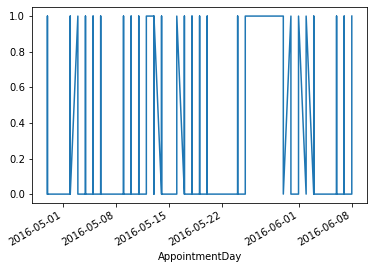

In [149]:
Appt_No_show=df['No-show'].apply(lambda x:Noshowind(x))
Appt_No_show.index = df['AppointmentDay']
Appt_No_show.plot()

# EDA 

In [150]:
# final["appt_wd"].value_counts()
# create feature of week day
final=pd.DataFrame()
Appt_weekday = df['AppointmentDay'].dt.day_name()
Scheduled_weekday=df['ScheduledDay'].dt.day_name()

#prepare countplot
final = pd.DataFrame(list(zip(Appt_weekday, Scheduled_weekday,Appt_No_show)), columns =['appt_wd', 'schedule_wd','Noshow'])
final['no_show']=df[['No-show']]

In [151]:
Scheduled_Month=df['ScheduledDay'].dt.month
final['Month']=Scheduled_Month

In [152]:
final.head(2)

,appt_wd,schedule_wd,Noshow,no_show,Month
0,Friday,Friday,0,No,4
1,Friday,Friday,0,No,4


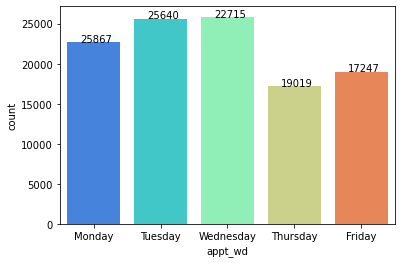

In [153]:
ax=sns.countplot(x="appt_wd", order=['Monday','Tuesday','Wednesday','Thursday','Friday'], data=final,palette='rainbow')
for p, label in zip(ax.patches, final["appt_wd"].value_counts()):
     ax.annotate(label, (p.get_x()+0.2, p.get_height()+0.15))

#### No clear pattern of SNS counts vs workday

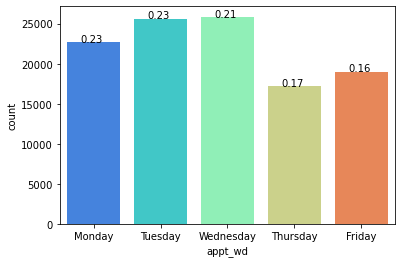

In [154]:
ax=sns.countplot(x="appt_wd", order=['Monday','Tuesday','Wednesday','Thursday','Friday'], data=final,palette='rainbow')
for p, label in zip(ax.patches, round(final["appt_wd"].value_counts()/len(final),2)):
     ax.annotate(label, (p.get_x()+0.2, p.get_height()+0.15))

#### No clear pattern of SNS percentage vs workday

In [155]:
pltpct=pd.DataFrame(final["appt_wd"].value_counts() / len(final))
# pltpct.index=['a','b''c','d','e','r']
'Monday','Tuesday','Wednesday','Thursday','Friday'
final["appt_wd"].unique()

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

In [156]:
final.describe()

,Noshow,Month
count,110527.000000,110527.000000
mean,0.201933,4.823871
std,0.401444,0.715801
min,0.000000,1.000000
25%,0.000000,4.000000
50%,0.000000,5.000000
75%,0.000000,5.000000
max,1.000000,12.000000


### Create feature of delay time or time_diff_days= appintmentday-scheduledday

In [157]:
# difference of the appointment-schedule day
ScheduledDay=pd.to_datetime(df.ScheduledDay)
AppointmentDay=pd.to_datetime(df.AppointmentDay)
df['time_diff_days']=abs(AppointmentDay-ScheduledDay).dt.days


<Figure size 7200x14400 with 0 Axes>

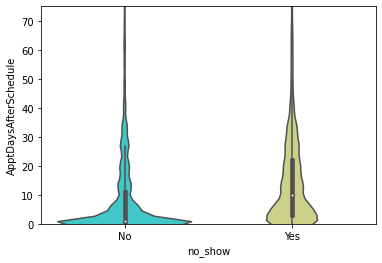

<Figure size 7200x14400 with 0 Axes>

In [158]:
final['ApptDaysAfterSchedule']=df[['time_diff_days']]
ax=sns.violinplot(x='no_show', y='ApptDaysAfterSchedule', data=final, palette='rainbow')
ax.set(ylim=(0, 75))
plt.figure(figsize=(100,200))

#### Very interesting plots shows the noshow population is significantly different from showed population

***Figure:***
The violinplot show the longer the waiting time, higher chance for no show

In [159]:
#add month to final_dataset or df
df['Month']=final['Month']
# final.columns
# df.columns

### Additional EDA Analysis

#### Histogram plots with different hue, change on percentage

In [160]:
final_dataset=df[['PatientID','AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'LocationID', 'MedicaidIND', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Disability', 'SMS_received', 'No-show', 'time_diff_days','Month']]

<AxesSubplot:xlabel='Disability', ylabel='count'>

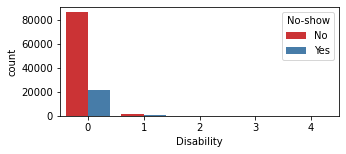

In [161]:
plt.figure(figsize=(5,2))
sns.countplot(x='Disability',hue='No-show',data=final_dataset,palette='Set1')

In [162]:
final_dataset.head(3)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,LocationID,MedicaidIND,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No-show,time_diff_days,Month
0,#29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,40,0,1,0,0,0,0,No,0,4
1,#558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,40,0,0,0,0,0,0,No,0,4
2,#4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,47,0,0,0,0,0,0,No,0,4


### EDA and Feature Engineering

In [163]:
def ConvNoshow(x):
    if x=='Yes': return 1
    else: return 0
final_dataset['NoShow']=final_dataset['No-show'].apply(ConvNoshow)
final_dataset.drop(['No-show'],axis=1,inplace=True)

In [164]:
def ConvGender(x):
    if x=='M': return 1
    else: return 0
final_dataset['GenderC']=final_dataset['Gender'].apply(ConvGender)
final_dataset.drop(['Gender'],axis=1,inplace=True)

In [165]:
final_dataset.head(3)

,PatientID,AppointmentID,ScheduledDay,AppointmentDay,Age,LocationID,MedicaidIND,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,time_diff_days,Month,NoShow,GenderC
0,#29872499824296,5642903,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,40,0,1,0,0,0,0,0,4,0,0
1,#558997776694438,5642503,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,40,0,0,0,0,0,0,0,4,0,1
2,#4262962299951,5642549,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,47,0,0,0,0,0,0,0,4,0,0


In [166]:
# final_dataset['appt_wd']=final['appt_wd']
# final_dataset['schedule_wd']=final['schedule_wd']
final_dataset['appt_wd']= df['AppointmentDay'].dt.weekday
final_dataset['schedule_wd']=df['ScheduledDay'].dt.weekday
final_dataset['PatientIDLength']=df['PatientID'].apply(lambda x:len(x))

In [167]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientID        110527 non-null  object             
 1   AppointmentID    110527 non-null  int64              
 2   ScheduledDay     110527 non-null  datetime64[ns, UTC]
 3   AppointmentDay   110527 non-null  datetime64[ns, UTC]
 4   Age              110527 non-null  int64              
 5   LocationID       110527 non-null  int64              
 6   MedicaidIND      110527 non-null  int64              
 7   Hypertension     110527 non-null  int64              
 8   Diabetes         110527 non-null  int64              
 9   Alcoholism       110527 non-null  int64              
 10  Disability       110527 non-null  int64              
 11  SMS_received     110527 non-null  int64              
 12  time_diff_days   110527 non-null  int64              
 13 

#### group features with integer data type

In [174]:
final=final_dataset.select_dtypes('int')



In [176]:
final.columns

Index(['AppointmentID', 'Age', 'LocationID', 'MedicaidIND', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Disability', 'SMS_received',
       'time_diff_days', 'Month', 'NoShow', 'GenderC', 'appt_wd',
       'schedule_wd', 'PatientIDLength'],
      dtype='object')

### Feature Selection

In [177]:

# insert column using insert(position,column_name,first_column) function
final=final[['AppointmentID', 'Age', 'LocationID', 'MedicaidIND', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Disability', 'SMS_received',
       'time_diff_days', 'Month',  'GenderC', 'appt_wd',
       'schedule_wd', 'PatientIDLength','NoShow']]

In [178]:
final.corr()

,AppointmentID,Age,LocationID,MedicaidIND,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,time_diff_days,Month,GenderC,appt_wd,schedule_wd,PatientIDLength,NoShow
AppointmentID,1.000000,-0.019126,0.000545,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,-0.771191,0.817793,0.018496,-0.053292,-0.008224,-0.000064,-0.162602
Age,-0.019126,1.000000,-0.012919,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,0.032707,-0.003040,-0.106440,0.003088,0.011401,0.002366,-0.060319
LocationID,0.000545,-0.012919,1.000000,0.001727,-0.002223,0.006531,-0.003352,0.009713,0.019962,0.005682,0.004933,-0.008767,-0.001056,0.013991,0.004082,-0.009812
MedicaidIND,0.022615,-0.092457,0.001727,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.030076,0.016812,-0.114293,-0.000673,-0.004963,-0.001552,0.029135
Hypertension,0.012752,0.504586,-0.002223,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.018750,0.024992,-0.055718,0.003455,0.000685,0.007353,-0.035701
Diabetes,0.022628,0.292391,0.006531,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.028082,0.025596,-0.032554,0.006614,-0.000383,0.008673,-0.015180
Alcoholism,0.032944,0.095811,-0.003352,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.037822,0.028771,0.106167,0.002701,0.006630,0.002942,-0.000196
Disability,0.014106,0.078033,0.009713,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.019534,0.014953,0.022814,0.004352,0.000611,-0.004891,-0.006076
SMS_received,-0.256618,0.012643,0.019962,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.388193,-0.294089,-0.046298,-0.089858,0.078555,-0.006695,0.126431
time_diff_days,-0.771191,0.032707,0.005682,-0.030076,-0.018750,-0.028082,-0.037822,-0.019534,0.388193,1.000000,-0.597800,-0.027201,-0.011942,0.014503,0.003021,0.180087


In [179]:
# sns.pairplot(final_dataset)
corrmat=final.corr()
top_corr_features = corrmat.index

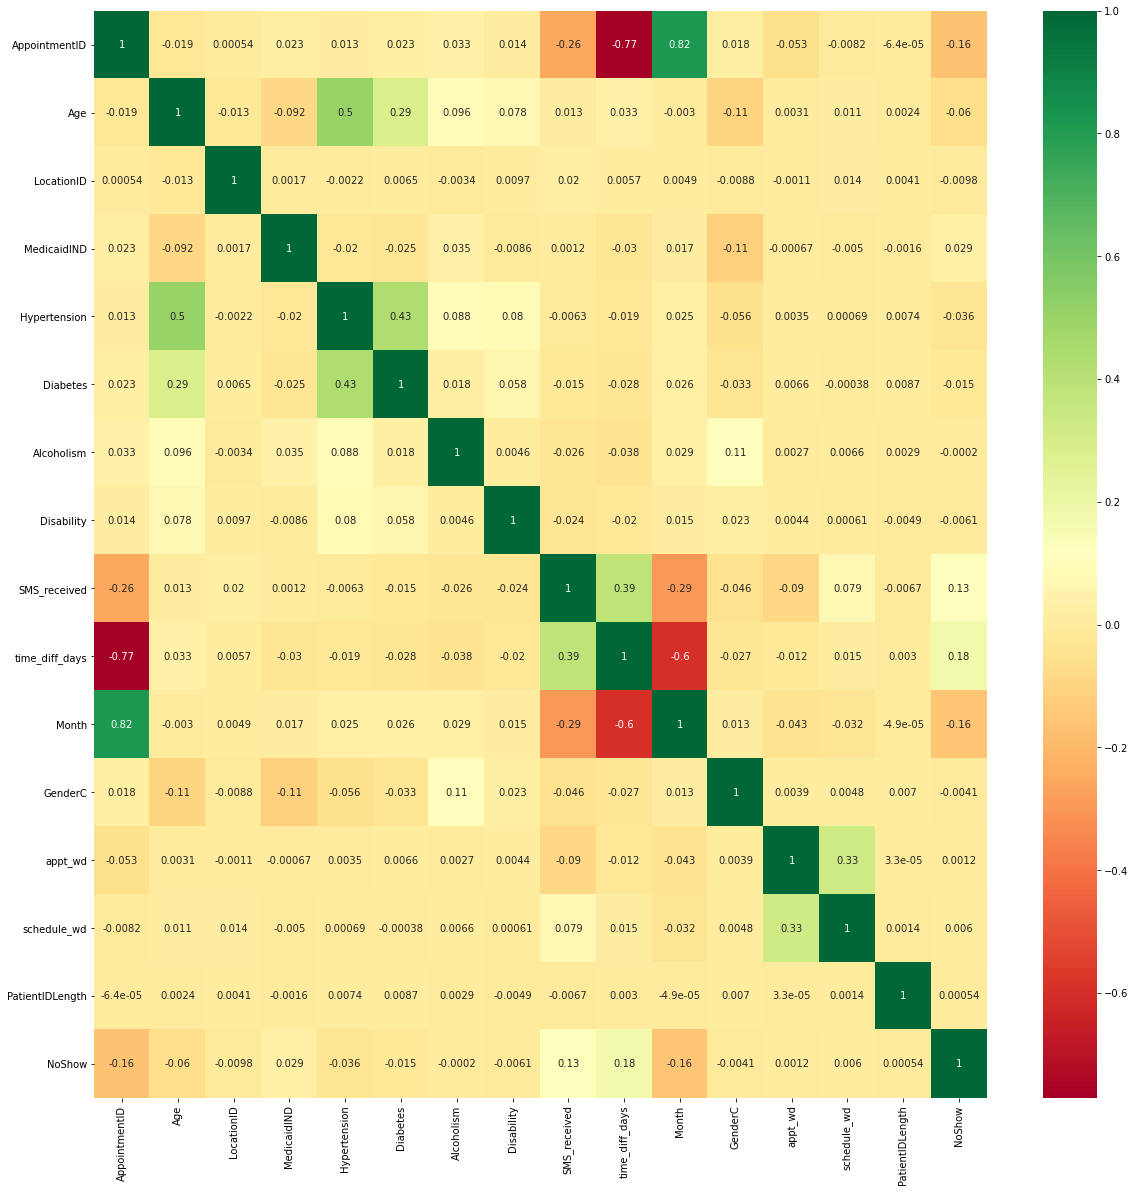

In [181]:

#get correlations of each features in dataset
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final.corr(),annot=True,cmap="RdYlGn")

***Figure:***
Correlation coefficient shows SMS recieved, time_diff_days,Appointment ID are highly correlated. However AppointmentID and time_diff_days are autocorrelated and has no physical meaning, should be removed frmo trainning set

In [184]:
final

,AppointmentID,Age,LocationID,MedicaidIND,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,time_diff_days,Month,GenderC,appt_wd,schedule_wd,PatientIDLength,NoShow
0,5642903,62,40,0,1,0,0,0,0,0,4,0,4,4,15,0
1,5642503,56,40,0,0,0,0,0,0,0,4,1,4,4,16,0
2,5642549,62,47,0,0,0,0,0,0,0,4,0,4,4,14,0
3,5642828,8,55,0,0,0,0,0,0,0,4,0,4,4,13,0
4,5642494,56,40,0,1,1,0,0,0,0,4,0,4,4,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,5651768,56,45,0,0,0,0,0,1,34,5,0,1,1,14,0
110523,5650093,51,45,0,0,0,0,0,1,34,5,0,1,1,14,0
110524,5630692,21,45,0,0,0,0,0,1,40,4,0,1,2,15,0
110525,5630323,38,45,0,0,0,0,0,1,40,4,0,1,2,15,0


In [185]:
X=final.iloc[:,:15]
y=final.iloc[:,15:]

<ipython-input-189-50256aa581c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=X['Age'].apply(lambda x: x if x>0 else 0)


(array([1.9945e+04, 1.4732e+04, 1.6949e+04, 1.5960e+04, 1.8675e+04,
        1.4137e+04, 7.2770e+03, 2.6100e+03, 2.3700e+02, 5.0000e+00]),
 array([  0. ,  11.5,  23. ,  34.5,  46. ,  57.5,  69. ,  80.5,  92. ,
        103.5, 115. ]),
 <BarContainer object of 10 artists>)

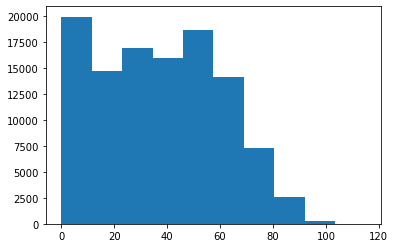

In [189]:
# remove negative value from Age
X['Age']=X['Age'].apply(lambda x: x if x>0 else 0)
plt.hist(X['Age'],histtype='bar')

Figure:Remove Negative Age from age column

## Feature Selection Method 1: Chi Square Test

In [209]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X,y)
f_p_values

(array([2.61730885e+06, 5.79071721e+03, 1.20179079e+02, 8.46014891e+01,
        1.13087858e+02, 2.36385024e+01, 4.11876448e-03, 4.78646625e+00,
        1.19957265e+03, 8.49159406e+04, 3.03779312e+02, 1.21863194e+00,
        1.51782804e-01, 4.11032237e+00, 2.78761771e-03]),
 array([0.00000000e+000, 0.00000000e+000, 5.78001137e-028, 3.64990231e-020,
        2.06422351e-026, 1.16238336e-006, 9.48828812e-001, 2.86842171e-002,
        7.55395178e-263, 0.00000000e+000, 4.94770206e-068, 2.69629302e-001,
        6.96837436e-001, 4.26222375e-002, 9.57892939e-001]))

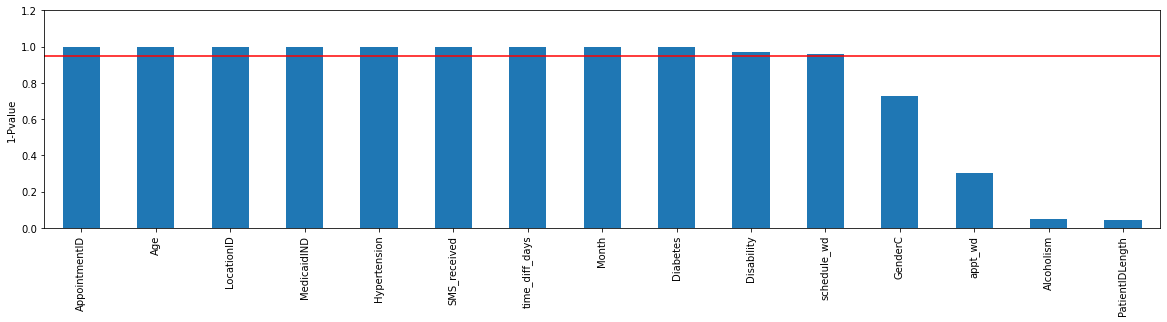

In [192]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values
axes = (1-p_values).sort_values(ascending=False).plot.bar(figsize=(20, 4))
axes.set_ylim([0,1.2])
axes.set_ylabel('1-Pvalue')
plt.axhline(y = 0.95, color = 'r', linestyle = '-')


#### Conclusion: Chi Square Test indicates the features are different between group of show-no-show should be incldue into model

## Feature Selection Method 2: Information Gain

#### Split Training and Testing sets

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [198]:
y_train.value_counts()

NoShow
0         61646
1         15722
dtype: int64

** Train and fit a logistic regression model on the training set.**

###Evaluate feature importance from information gain

https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/3-%20Information%20gain%20-%20mutual%20information%20In%20Classification.ipynb

In [210]:
from sklearn.feature_selection import mutual_info_classif

In [211]:
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train.values.ravel())
mutual_info

array([0.04188081, 0.00464485, 0.00442162, 0.00011383, 0.00089414,
       0.        , 0.00035867, 0.        , 0.00830336, 0.04511166,
       0.02024121, 0.00102476, 0.00139991, 0.00157101, 0.00259748])

<AxesSubplot:>

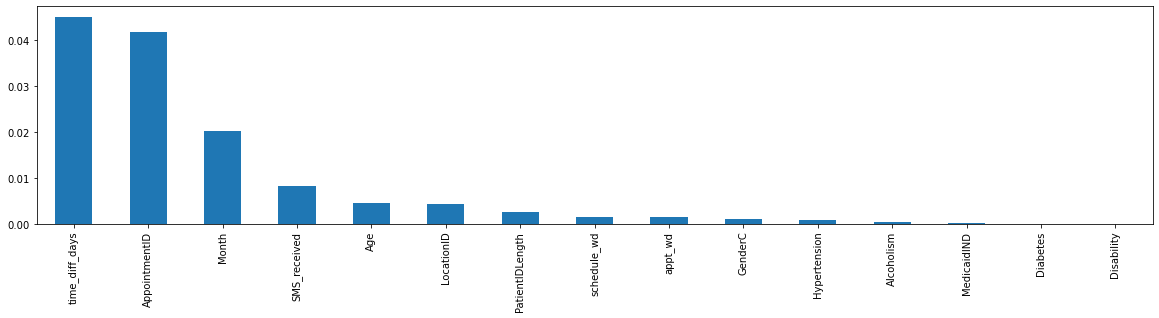

In [212]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 4))

In [203]:
from sklearn.feature_selection import SelectKBest

In [204]:
sel_five_cols = SelectKBest(mutual_info_classif, k=6)
sel_five_cols.fit(X_train, y_train.values.ravel())
X_train.columns[sel_five_cols.get_support()]

Index(['AppointmentID', 'Age', 'SMS_received', 'time_diff_days', 'Month',
       'appt_wd'],
      dtype='object')

In [205]:
X_train.columns

Index(['AppointmentID', 'Age', 'LocationID', 'MedicaidIND', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Disability', 'SMS_received',
       'time_diff_days', 'Month', 'GenderC', 'appt_wd', 'schedule_wd',
       'PatientIDLength'],
      dtype='object')

### Feature Selection Method 3: Random Forest Classification for feature importance

In [213]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [214]:
rfcmodel = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=5, 
                                  min_samples_leaf=2, max_features='sqrt', bootstrap=True, n_jobs=-1, random_state=42)
rfcmodel.fit(X_train,y_train.values.ravel())
y_pred_test = rfcmodel.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_test))
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_test))

[[26113   449]
 [ 5959   638]]
0.806749298832896


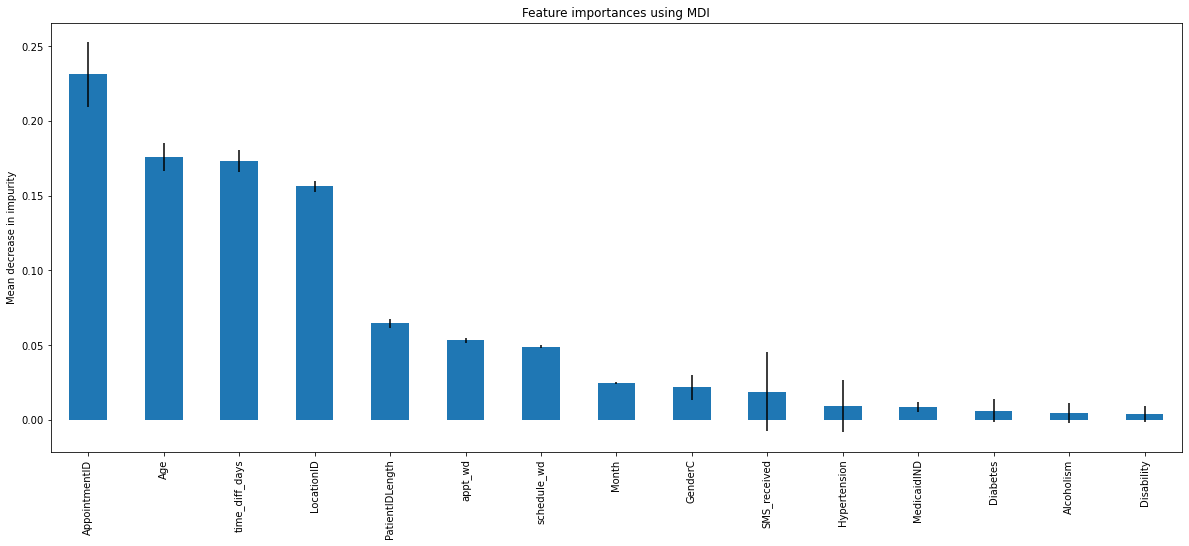

In [215]:
importances = rfcmodel.feature_importances_
feature_names=X_train.columns
std = np.std([
    tree.feature_importances_ for tree in rfcmodel.estimators_], axis=0)
# elapsed_time = time.time() - start_time

# print(f"Elapsed time to compute the importances: "
#       f"{elapsed_time:.3f} seconds")

from sklearn.inspection import permutation_importance
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.set_size_inches(18.5, 10.5)

#### Conclustion: Comparing with Cycle 1; the new features could improve the prediction. It looks promising... 

# Modeling

### Random Forest Model

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import model_selection

# random forest model creation
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train.values.ravel())
# predictions
rfc_train_predict = rfc.predict(X_train)
rfc_test_predict = rfc.predict(X_test)


### Metrics

In [218]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

rfc_cv_train_score = cross_val_score(rfc, X_train,y_train.values.ravel(), cv=10, scoring='roc_auc')

In [219]:
print("=== Confusion Matrix train ===")
print(confusion_matrix(y_train, rfc_train_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train, rfc_train_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_train_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_train_score.mean())

=== Confusion Matrix train ===
[[61646     0]
 [    0 15722]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61646
           1       1.00      1.00      1.00     15722

    accuracy                           1.00     77368
   macro avg       1.00      1.00      1.00     77368
weighted avg       1.00      1.00      1.00     77368



=== All AUC Scores ===
[0.72932462 0.73220857 0.73657044 0.74244721 0.73710478 0.7336886
 0.73398325 0.73758196 0.74091308 0.73708839]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7360910880690466


In [220]:
rfc_cv_test_score = cross_val_score(rfc, X_test,y_test.values.ravel(), cv=10, scoring='roc_auc')

In [222]:
print("=== Confusion Matrix test===")
print(confusion_matrix(y_test, rfc_test_predict))
print('\n')
print("=== Classification Report test ===")
print(classification_report(y_test, rfc_test_predict))
print('\n')
print("=== All AUC Scores test ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score test===")
print("Mean AUC Score - Random Forest: ", rfc_cv_test_score.mean())

=== Confusion Matrix test===
[[25705   857]
 [ 5635   962]]


=== Classification Report test ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     26562
           1       0.53      0.15      0.23      6597

    accuracy                           0.80     33159
   macro avg       0.67      0.56      0.56     33159
weighted avg       0.76      0.80      0.76     33159



=== All AUC Scores test ===
[0.73010825 0.72879698 0.73370041 0.74119573 0.73716493 0.73365888
 0.73132606 0.74105427 0.73930097 0.73671955]


=== Mean AUC Score test===
Mean AUC Score - Random Forest:  0.720079639433117


#### Although significant improvement from previous cycle, it is  clearly overfitting still room to improve 
#### trade off between precision and recall could be discussed for thredshold decisions etc

In [86]:
#https://blog.dataiku.com/narrowing-the-search-which-hyperparameters-really-matter
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/Exercise/15_grid_search_cv_exercise.ipynb

## ROC AUC

In [225]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.svm import SVC

Text(0.5, 0.98, 'ROC curve comparison')

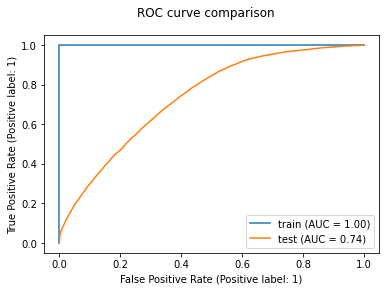

In [226]:
train_roc=metrics.plot_roc_curve(rfc, X_train, y_train, name='train') 
test_roc=metrics.plot_roc_curve(rfc, X_test, y_test, ax=train_roc.ax_, name='test') 
test_roc.figure_.suptitle("ROC curve comparison")

### Model Selection

In [235]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [236]:
from IPython.display import Javascript
display(Javascript('IPython.notebook.execute_cells_below()'))

<IPython.core.display.Javascript object>

In [246]:
model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {
#             'C': [10],  #1,10,20
#             'kernel': ['rbf'] #'rbf','linear'
#         }  
#     },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
        'n_estimators': [100, 500, 1000], #
        # Number of features to consider at every split
        'max_features' : ['auto'],
        # Minimum number of samples required at each leaf node
        'min_samples_leaf' : [2]

        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [247]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=True)
    clf.fit(X_train, y_train.values.ravel())
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.800240,"{'max_features': 'auto', 'min_samples_leaf': 2..."
1,logistic_regression,0.796789,{'C': 1}
2,naive_bayes_gaussian,0.773860,{}
3,decision_tree,0.720091,{'criterion': 'entropy'}


#### RandomForest outperform other models in our preliminary tests

### HyperParameters Fine Tuning for RandomForest

In [252]:
df.loc[0,'best_params']

{'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 1000}

In [253]:
rfcmodel = RandomForestClassifier(n_estimators=1000, criterion='gini', min_samples_split=5, 
                                  min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
rfcmodel.fit(X_train,y_train.values.ravel())
y_pred_test = rfcmodel.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_test))
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_test))

[[26181   381]
 [ 5993   604]]
0.807774661479538


In [254]:
y_pred_train = rfcmodel.predict(X_train)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred_train))
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_pred_train))

[[61632    14]
 [ 6040  9682]]
0.9217505945610588


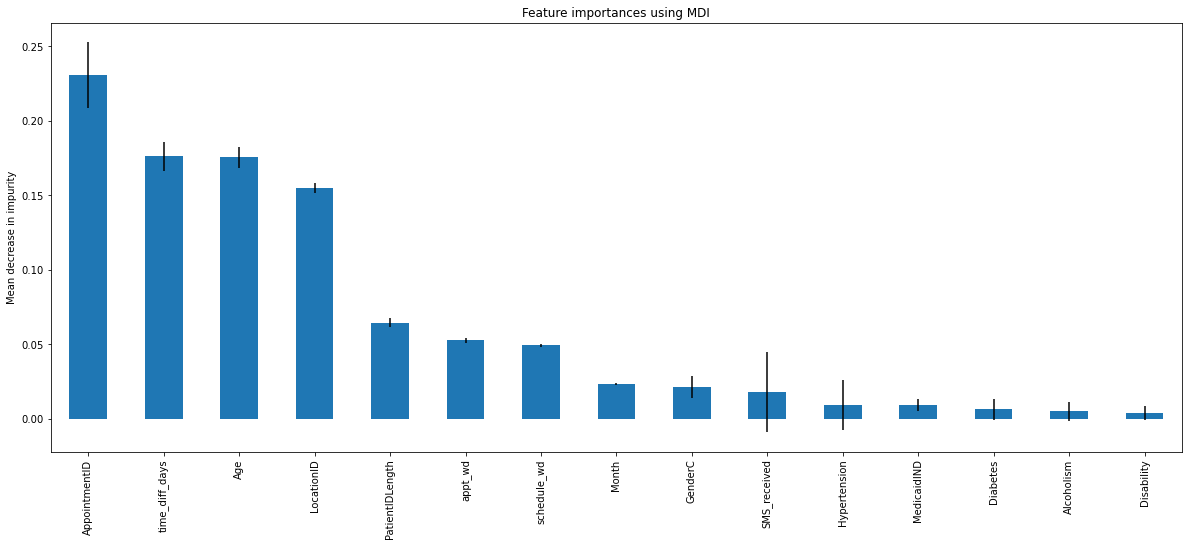

In [255]:
importances = rfcmodel.feature_importances_
feature_names=X_train.columns
std = np.std([
    tree.feature_importances_ for tree in rfcmodel.estimators_], axis=0)
# elapsed_time = time.time() - start_time

# print(f"Elapsed time to compute the importances: "
#       f"{elapsed_time:.3f} seconds")

from sklearn.inspection import permutation_importance
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.set_size_inches(18.5, 10.5)

Text(0.5, 0.98, 'ROC curve comparison')

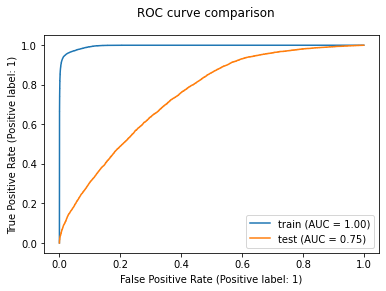

In [257]:
train_roc=metrics.plot_roc_curve(rfcmodel, X_train, y_train, name='train') 
test_roc=metrics.plot_roc_curve(rfcmodel, X_test, y_test, ax=train_roc.ax_, name='test') 
test_roc.figure_.suptitle("ROC curve comparison")

### Better, still overfitting. could improve by further hyperparameter tunning, recommendation?

### Prepare pickle dump file for app deployment

In [243]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_classification_model.pkl', 'wb')

# dump information to that file
pickle.dump(rfcmodel, file)

### Decide to implement model into PowerBI

# Summary

In [262]:
'''
1. features are good indicator of Hospital Show/Noshow (SNS) are 
    delay time more than 8 days
    months is 4 or less (spring)
    age is 47 or less
    SMS is recieved

2. Randomforest Classifier outperforms other classification methods
3. final selected model has robust AUC 0.72 for both training and testing set
4. However there is still overfitting, more hyperparameter tunning could improve the model repeatability
5. More feature engineering could improve model predictability
'''